0.6600000000000004

1.580999999999995

-0.14

array([[1.00000000e-20, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e-20],
       [9.99985000e-01, 9.99985000e-01, 9.99985000e-01, ...,
        9.99997000e-01, 9.99997000e-01, 9.99997000e-01],
       [9.99946700e-01, 9.99946700e-01, 9.99946700e-01, ...,
        9.99992000e-01, 9.99992000e-01, 9.99992000e-01],
       ...,
       [0.00000000e+00, 3.00191563e-03, 9.12172849e-03, ...,
        9.87231429e-01, 9.87230446e-01, 9.87230446e-01],
       [0.00000000e+00, 3.01512017e-03, 9.16045267e-03, ...,
        9.87139256e-01, 9.87138273e-01, 9.87138273e-01],
       [0.00000000e+00, 3.06793000e-03, 9.32089800e-03, ...,
        1.00442900e+00, 1.00442800e+00, 1.00000000e-20]])

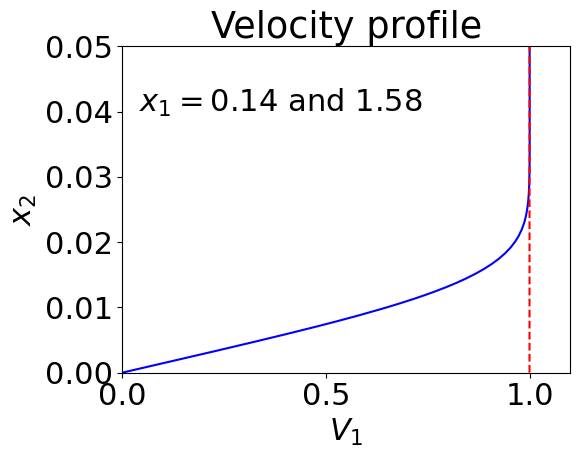

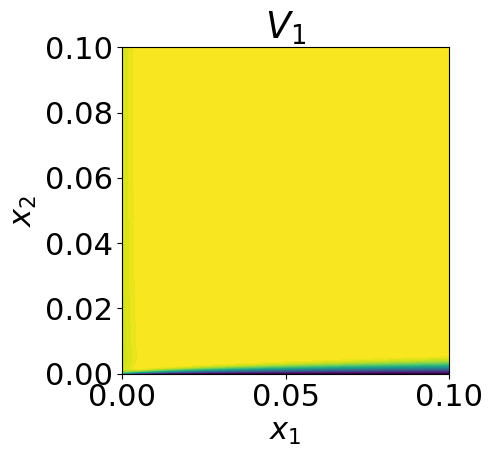

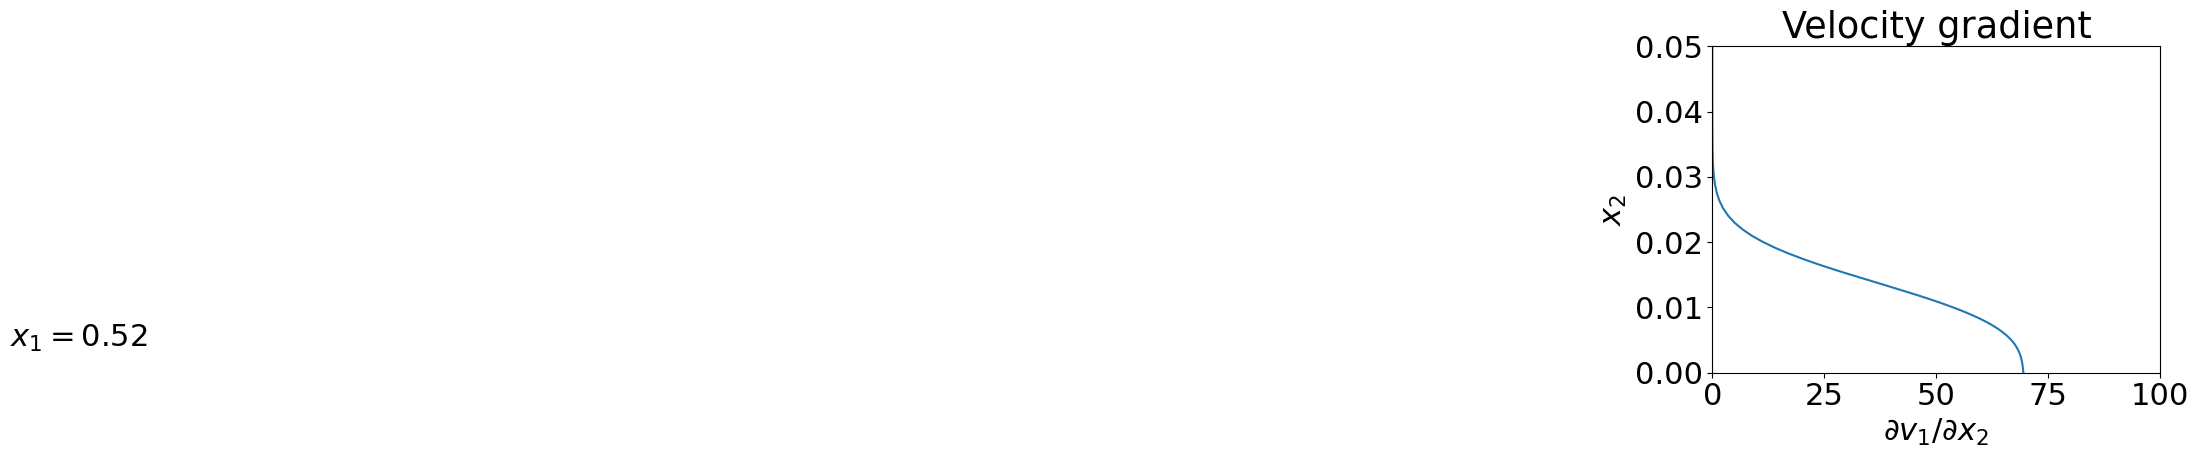

In [1]:
import numpy as np
from boundary_layer import *

a = (v1,(ni,nj))

# Coordinates of the points
display(xc[85])
display(xc[170])
display(xc[5])

# V_1inf, v1 freestream velocity
display(v1_2d)


## E1 Subtask 1

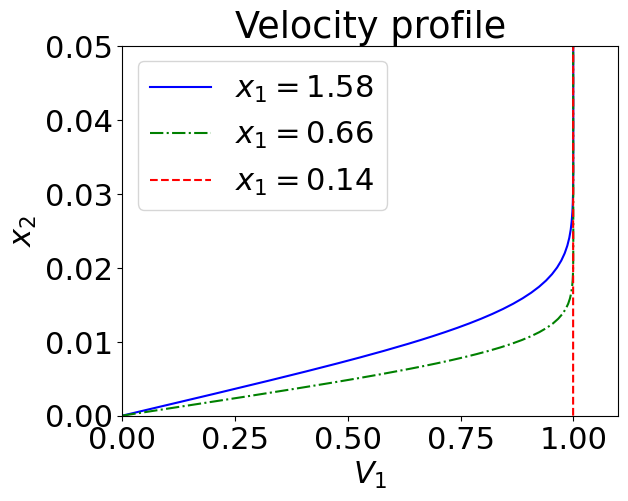

In [2]:
# Substask 1

i=170 # plot the velocity profile for i=170
plt.plot(v1_2d[i,:], x2_2d[i,:], 'b-', label='$x_1=1.58$')

i=85 # plot the velocity profile for i=85
plt.plot(v1_2d[i,:], x2_2d[i,:], 'g-.', label='$x_1=0.66$')

i=5 # plot the velocity profile for i=5
plt.plot(v1_2d[i,:], x2_2d[i,:], 'r--', label='$x_1=0.14$')

plt.title('Velocity profile')
plt.axis([0,1.1,0,0.05])
plt.xlabel('$V_1$') 
plt.ylabel('$x_2$') 

plt.legend(loc='best')
plt.savefig('velprof.png')


## E1 Subtask 2

V1_inf: 0.9896767627558745


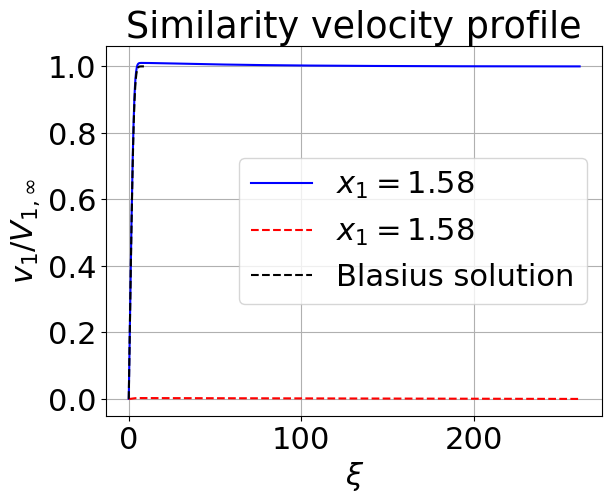

In [ ]:
i = 170 # plot the dimensioneless velocity profile for i=170

# Freestream velocity at x1 location
V1_inf = v1_2d[i,-1] 

xi = yp * np.sqrt(V1_inf / (viscos * xc[i]))
v1_norm = v1_2d[i, :] / V1_inf
v2_norm = v2_2d[i, :] / V1_inf

print('V1_inf:', V1_inf)

#print(v2_norm)



# Plot
plt.figure()
plt.plot(xi, v1_norm, 'b-', label=fr'$x_1={xc[i]:.2f}$')
plt.plot(xi, v2_norm, 'r--', label=fr'$x_1={xc[i]:.2f}$')

# Adding Blasius solution for comparison
plt.plot(xi_blas, u_blas, 'k--', label='Blasius solution')

plt.xlabel(r'$\xi$')
plt.ylabel(r'$v_1 / V_{1,\infty}$')
plt.title('Similarity velocity profile')
plt.legend()
plt.grid(True)
plt.show()


## E2

0.02196174575714901
57
0.02463831745407603


/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_35401/1177806321.py:11: RuntimeWarning: invalid value encountered in sqrt
  delta_gg_blasius = 5 * np.sqrt((viscos * xc)/V1_inf)


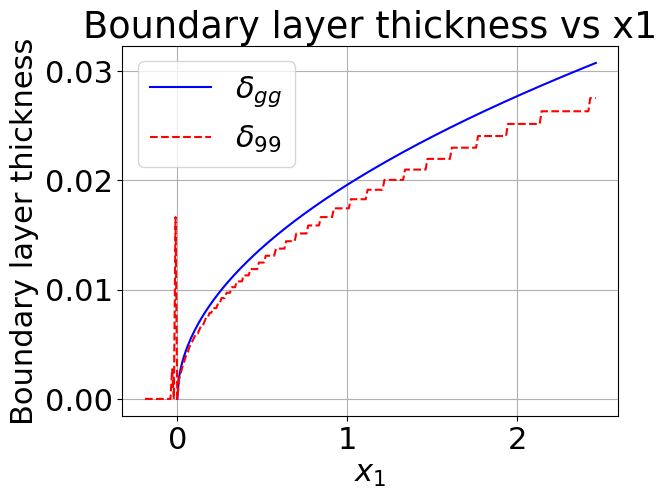

In [4]:


# Need to find x2 at the location where v1 = 0.99*V1_inf
index_gg_test = np.where(v1_2d[i,:] >= 0.99*V1_inf)[0][0]
delta_gg_test = x2_2d[i,index_gg_test]
print(delta_gg_test)
print(index_gg_test)

delta_gg = 5 * np.sqrt((viscos * xc[i])/V1_inf)
print(delta_gg)

# Need to now plot delta_gg and delta_gg_blasius as a function of x1
delta_gg_blasius = 5 * np.sqrt((viscos * xc)/V1_inf)
delta_99_all = np.zeros_like(xc)

for i in range(len(xc)):
    V1_inf = v1_2d[i,-1]
    index_99 = np.where(v1_2d[i,:] >= 0.99*V1_inf)[0][0]
    delta_99_all[i] = x2_2d[i,index_99]

plt.figure()
plt.plot(xc, delta_gg_blasius, 'b-', label=r'$\delta_{gg}$')
plt.plot(xc, delta_99_all, 'r--', label=r'$\delta_{99}$')
plt.xlabel(r'$x_1$')
plt.ylabel(r'Boundary layer thickness')
plt.title('Boundary layer thickness vs x1')
plt.legend()
plt.grid(True)
plt.show()

#delta_star = 

/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_35401/2736124046.py:45: RuntimeWarning: invalid value encountered in sqrt
  delta_star_blasius[i] = 1.721 * np.sqrt((viscos * x1[i]) / Vinf)
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_35401/2736124046.py:46: RuntimeWarning: invalid value encountered in sqrt
  theta_blasius[i]      = 0.664 * np.sqrt((viscos * x1[i]) / Vinf)


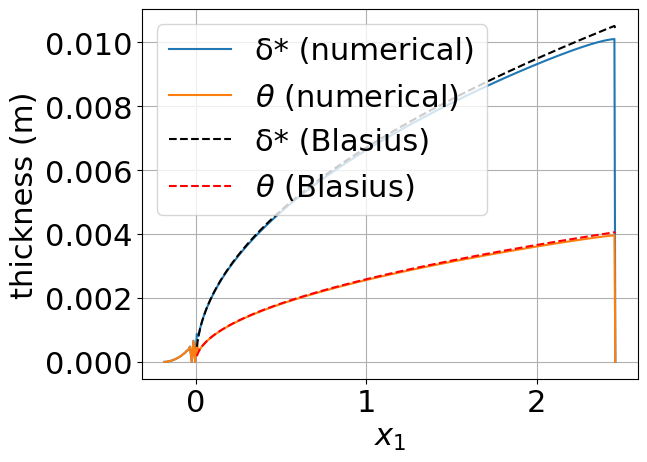

array([2.50000000e-05, 1.57197129e-06, 4.88129292e-06, 1.23926194e-05,
       2.38345198e-05, 3.81008380e-05, 5.61960042e-05, 7.73646704e-05,
       1.02976901e-04, 1.30842510e-04, 1.65165279e-04, 1.98803765e-04,
       2.44974446e-04, 2.81329216e-04, 3.46609985e-04, 3.75776261e-04,
       4.79520602e-04, 0.00000000e+00, 6.62627935e-04, 0.00000000e+00,
       8.77384055e-04, 8.04944725e-04, 1.06412530e-03, 1.25711712e-03,
       1.42450007e-03, 1.57220891e-03, 1.70691040e-03, 1.83158268e-03,
       1.94815039e-03, 2.05825068e-03, 2.16271966e-03, 2.26238138e-03,
       2.35784517e-03, 2.44960720e-03, 2.53805878e-03, 2.62353150e-03,
       2.70629979e-03, 2.78661034e-03, 2.86469387e-03, 2.94067814e-03,
       3.01474804e-03, 3.08705279e-03, 3.15766886e-03, 3.22676978e-03,
       3.29438653e-03, 3.36066205e-03, 3.42562783e-03, 3.48939018e-03,
       3.55201271e-03, 3.61352030e-03, 3.67401574e-03, 3.73350865e-03,
       3.79206087e-03, 3.84973611e-03, 3.90652613e-03, 3.96251632e-03,
      

array([2.50000000e-25, 1.57195230e-06, 4.88110783e-06, 1.23913998e-05,
       2.38300164e-05, 3.80892261e-05, 5.61703340e-05, 7.73153955e-05,
       1.02887308e-04, 1.30695309e-04, 1.64921384e-04, 1.98442643e-04,
       2.44392051e-04, 2.80544483e-04, 3.45284327e-04, 3.74187980e-04,
       4.76253419e-04, 0.00000000e+00, 6.49401073e-04, 0.00000000e+00,
       6.14449312e-04, 3.24250469e-04, 4.12128261e-04, 4.84233616e-04,
       5.47282963e-04, 6.03875322e-04, 6.55732285e-04, 7.03953058e-04,
       7.49061608e-04, 7.91758985e-04, 8.32272879e-04, 8.70930298e-04,
       9.07960728e-04, 9.43555664e-04, 9.77862642e-04, 1.01100947e-03,
       1.04310036e-03, 1.07423341e-03, 1.10450930e-03, 1.13395774e-03,
       1.16266217e-03, 1.19068568e-03, 1.21804022e-03, 1.24481906e-03,
       1.27100862e-03, 1.29668643e-03, 1.32184617e-03, 1.34654307e-03,
       1.37080067e-03, 1.39461602e-03, 1.41804784e-03, 1.44108338e-03,
       1.46375389e-03, 1.48609110e-03, 1.50807448e-03, 1.52975525e-03,
      

i=0, Vinf_last=1.000e-20, max=1.000e+00
i=1, Vinf_last=1.000e+00, max=1.000e+00
i=2, Vinf_last=1.000e+00, max=1.000e+00
i=3, Vinf_last=1.000e+00, max=1.000e+00
i=4, Vinf_last=1.000e+00, max=1.000e+00


In [ ]:
ni, nj = v1_2d.shape
# Creating empty arrays to store results
delta_star = np.zeros(ni)
theta = np.zeros(ni)

delta_star_blasius = np.zeros(ni)
theta_blasius = np.zeros(ni)

for i in range(ni):
    # local x2 array 
    x2 = x2_2d[i, :]

    # local velocity profile
    u = v1_2d[i, :].copy()

    # local freestream velocity (could also use constant V1_inf = 1.0)
    Vinf = np.max(v1_2d[i,:])
    if Vinf == 0:
        # avoid division by zero, skipping or setting to NaN
        delta_star[i] = np.nan
        theta[i] = np.nan
        continue


    # normalized velocity
    uhat = v1_2d[i,:] / Vinf

    # finding index of maximum u
    jmax = np.argmax(u)  # returns first index of maximum
    

    # integration domain up to jmax (include jmax)
    x2_int = x2[:jmax+1]
    uhat_int = uhat[:jmax+1]

    # integrands
    integrand_delta = 1.0 - uhat_int
    integrand_theta = uhat_int * (1.0 - uhat_int)

    # trapezoidal integration
    delta_star[i] = np.trapz(integrand_delta, x2_int)
    theta[i]      = np.trapz(integrand_theta, x2_int)

    delta_star_blasius[i] = 1.721 * np.sqrt((viscos * x1[i]) / Vinf)
    theta_blasius[i]      = 0.664 * np.sqrt((viscos * x1[i]) / Vinf)


    #delta_star_blasius[i] = np.trapz(1.7208 * np.sqrt((viscos * xc[i]) / Vinf, x2_int))
    #theta_blasius[i] = np.trapz(0.664 * np.sqrt((viscos * xc[]) / Vinf, x2_int))

# Plotting
x1 = x1_2d[:,0]
plt.figure()
plt.plot(x1[1:], delta_star[1:], label="δ* (numerical)")
plt.plot(x1[1:], theta[1:], label=r'$\theta$ (numerical)')
plt.plot(x1, delta_star_blasius, 'k--', label="δ* (Blasius)")
plt.plot(x1, theta_blasius, 'r--', label=r'$\theta$ (Blasius)')
plt.xlabel('$x_1$')
plt.ylabel('thickness (m)')
plt.legend()
plt.grid(True)
plt.show()

#display(delta_star, theta)

## E3

Text(0.5, 0, '$\\partial V_1 / \\partial x_2$')

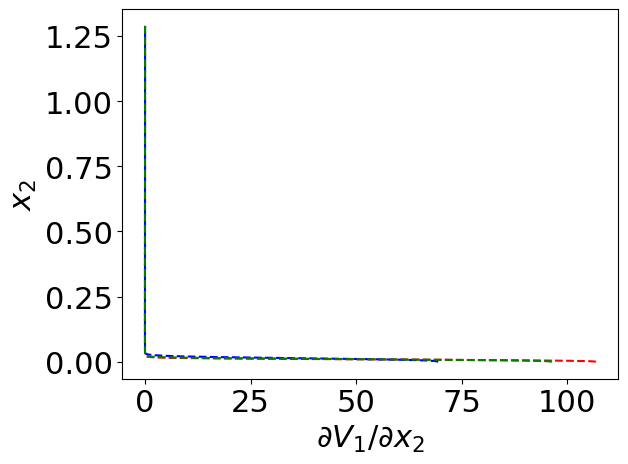

In [19]:
i = 85
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.figure()
plt.plot(gradient, x2_2d[i,:], 'r--')
i = 170
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.plot(gradient, x2_2d[i,:], 'b--')
i = 100
gradient = np.gradient(v1_2d[i,:], x2_2d[i,:])
plt.plot(gradient, x2_2d[i,:], 'g--')
plt.ylabel('$x_2$')
plt.xlabel('$\\partial V_1 / \\partial x_2$')

## E4

/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_35401/3679329401.py:25: RuntimeWarning: invalid value encountered in sqrt
  Cf_blas = 0.664 / np.sqrt((Vinf * x1) / viscos)
/var/folders/sx/4z1m0py94c98d4j3s1g4lz7m0000gn/T/ipykernel_35401/3679329401.py:28: RuntimeWarning: invalid value encountered in sqrt
  valid = np.isfinite(Cf) & (np.sqrt((Vinf * x1) / viscos) > 0)


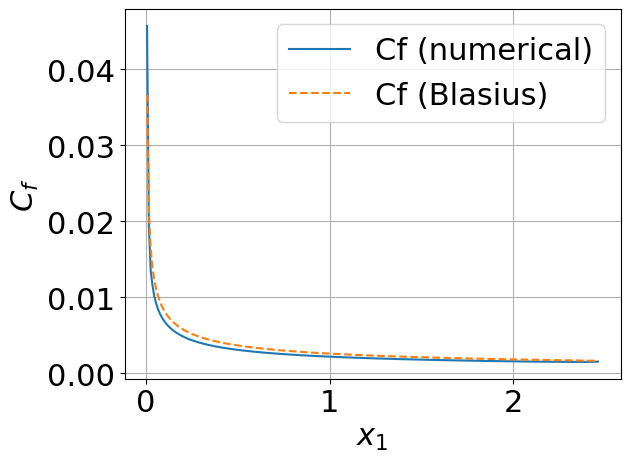

In [ ]:

rho = 1.204             # kg/m^3 at 20C

dvdx = np.gradient(v2_2d, xp, axis=0)  # ∂v2/∂x1

tau12 = viscos * (dudy + dvdx)   # shape (ni, nj) as denoted in boundary_layer.py

# extract wall shear stress at the wall index j=0
tau_w = tau12[:,0]          

Vinf = 1 # freestream velocity (assumed constant according to problem statement)

# local skin friction coefficient
Cf = tau_w / (0.5 * rho * Vinf**2)

# Blasius solution for Cf
Cf_blas = 0.664 / np.sqrt((Vinf * x1) / viscos)

# Plotting results
valid = np.isfinite(Cf) & (np.sqrt((Vinf * x1) / viscos) > 0) # Avoiding invalid values
plt.figure()
plt.plot(xp[valid], Cf[valid], label='Cf (numerical)')
plt.plot(xp[valid], Cf_blas[valid], '--', label='Cf (Blasius)')
plt.xlabel('$x_1$')
plt.ylabel('$C_f$')
plt.legend()
plt.grid(True)
plt.show()

## E5

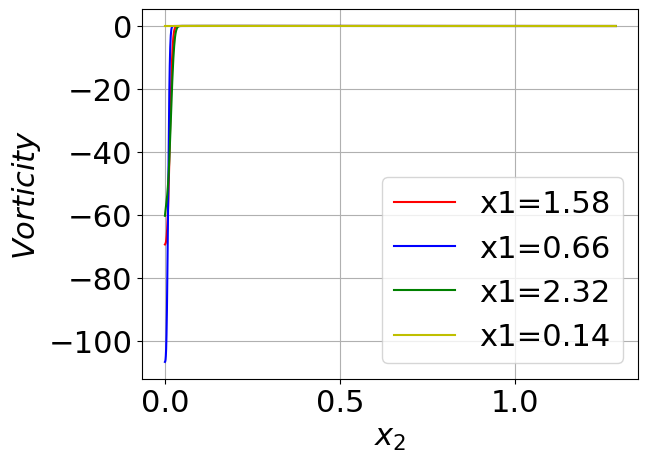

In [52]:
i = 170

dvdxe5 = np.gradient(v2_2d[i], xp[i], axis=0) 
dudye5 = np.gradient(v1_2d[i], yp[i])
vorticity = (dvdx - dudy)


plt.figure()
plt.plot(yp, vorticity[i,:], 'r-', label='x1=1.58')


i = 85

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)


plt.plot(yp, vorticity[i,:], 'b-', label='x1=0.66')

i = 250

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)

plt.plot(yp, vorticity[i,:], 'g-', label='x1=2.32')

i = 5

dvdxe5 = np.gradient(v2_2d[i,:], x1_2d[i,:], axis=0) 
dudye5 = np.gradient(v1_2d[i,:], x2_2d[i,:])
vorticity = (dvdx - dudy)

plt.plot(yp, vorticity[i,:], 'y-', label='x1=0.14')

plt.xlabel('$x_2$')
plt.ylabel('$Vorticity$')
plt.legend()
plt.grid(True)
plt.show()